In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util

# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

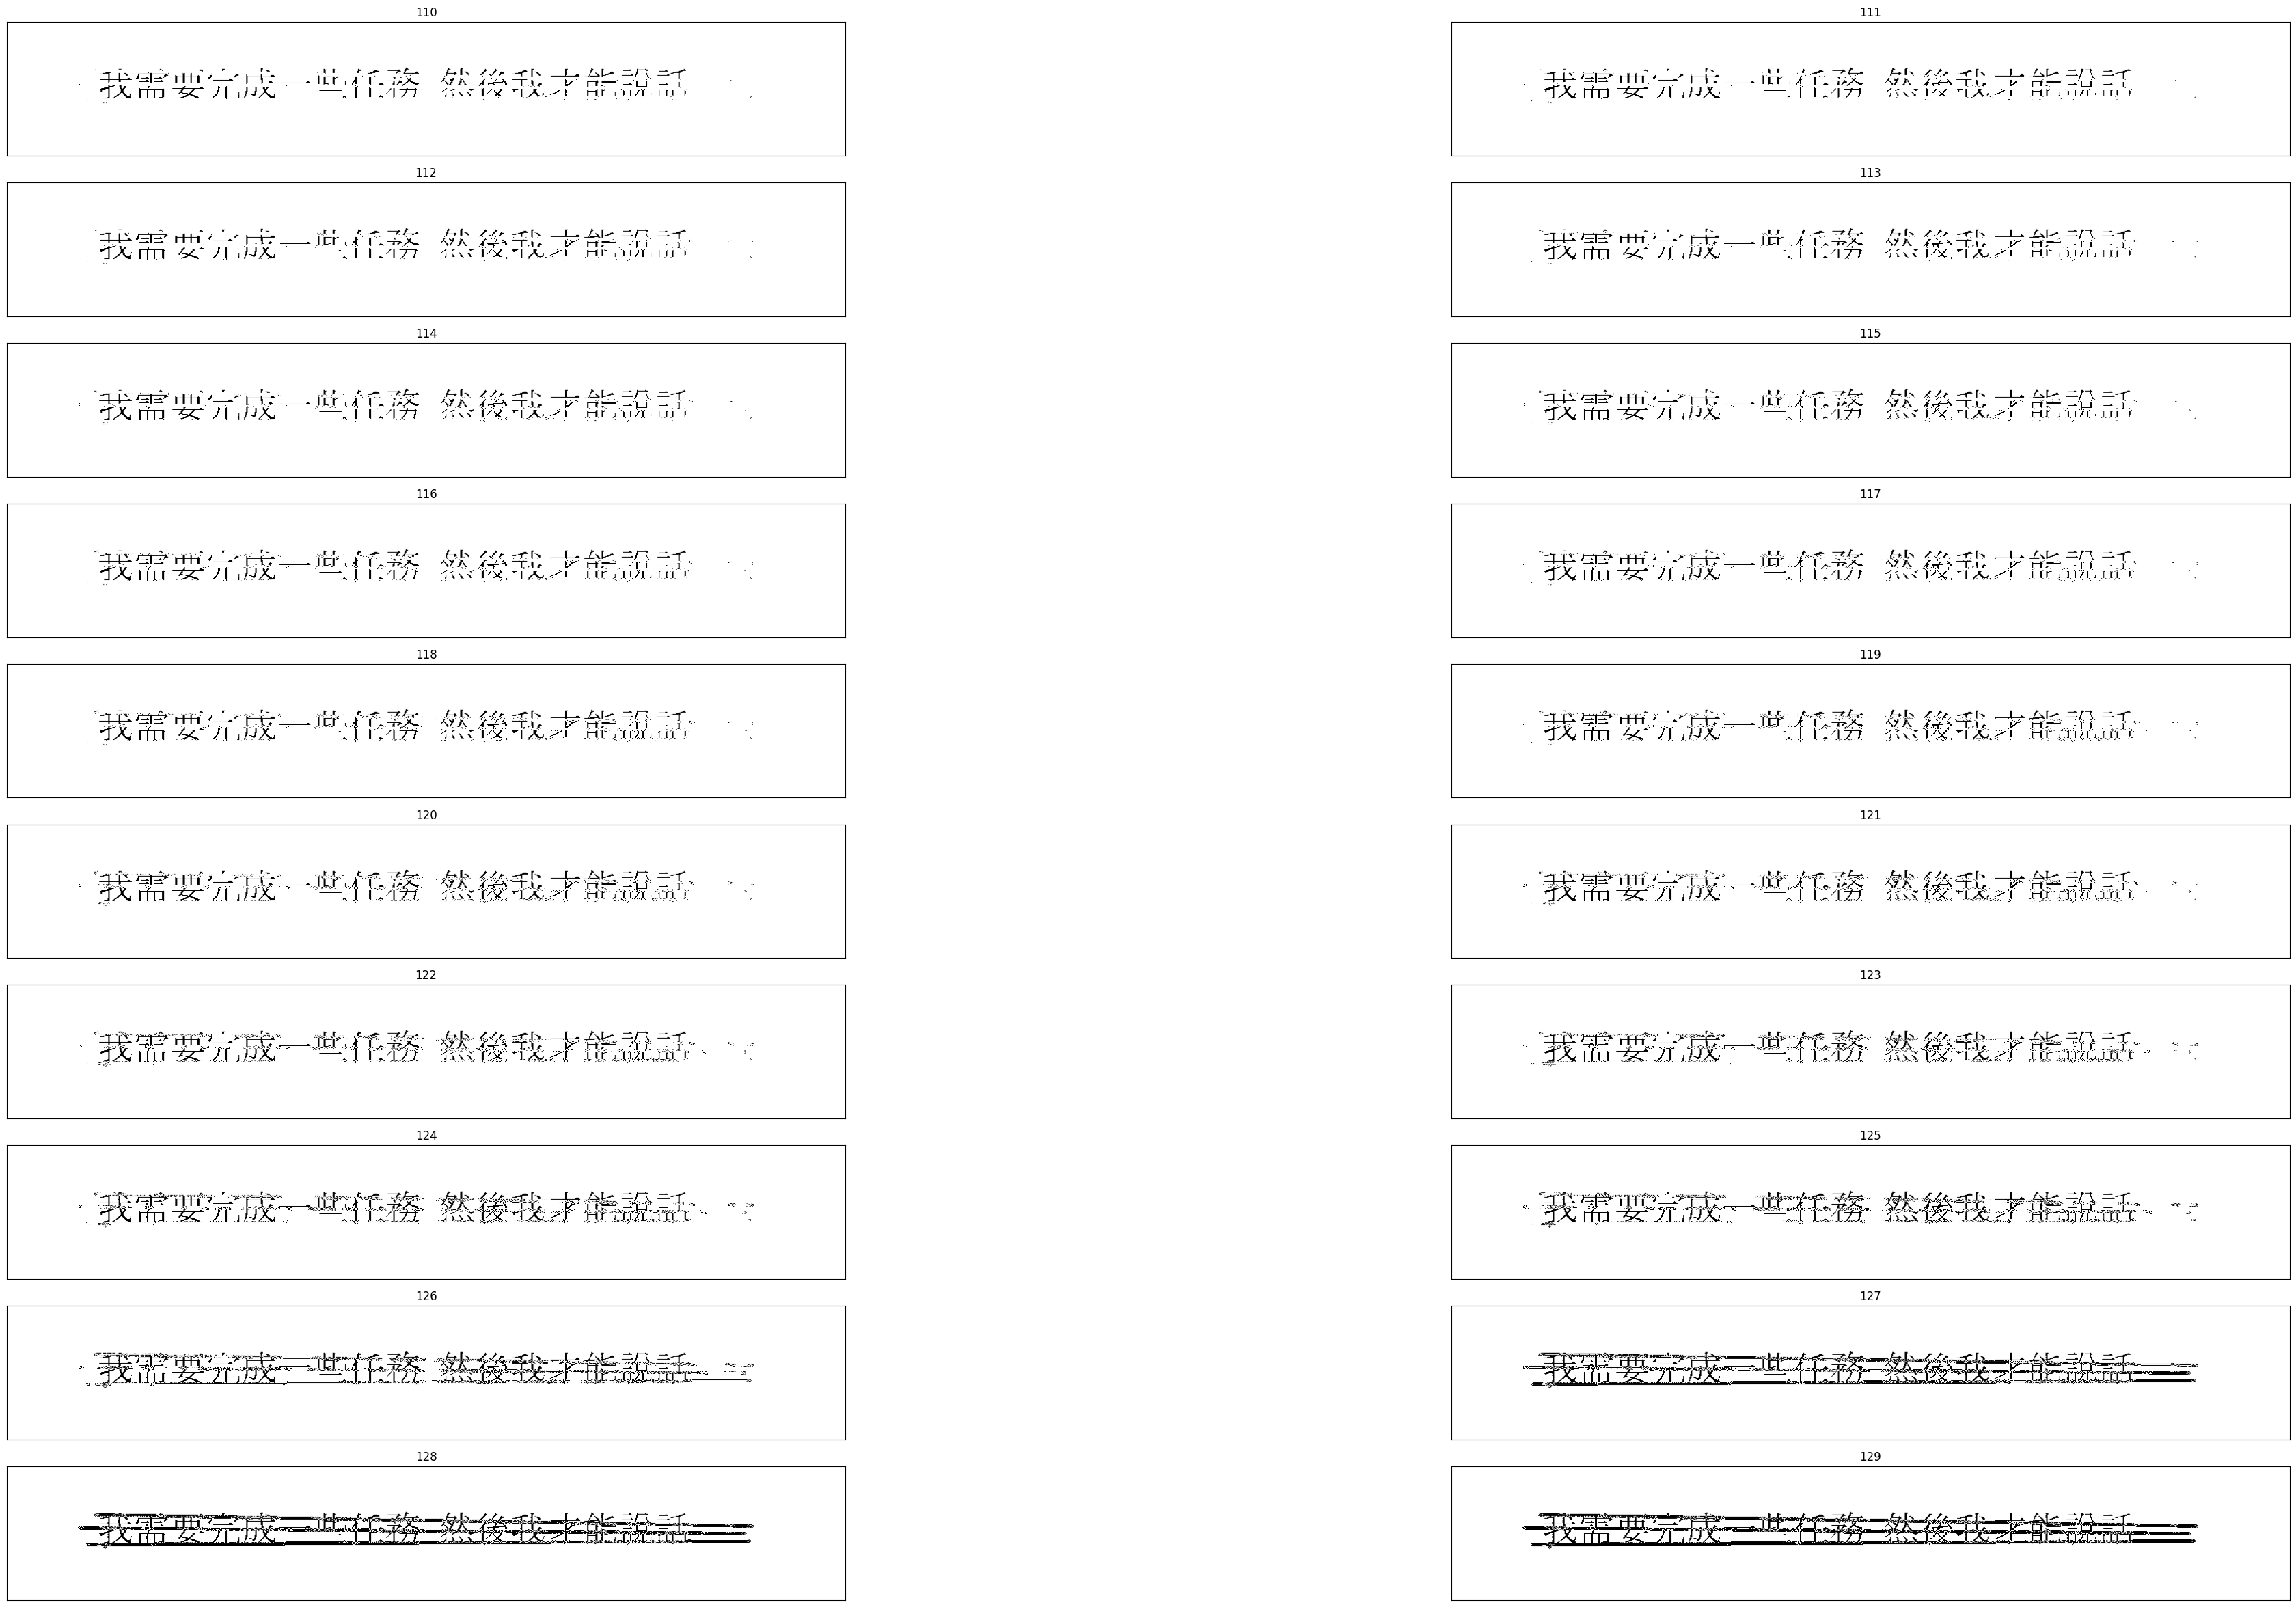

In [8]:
in_image = cv.imread('../images/lab4.png')
rgb_image = cv.cvtColor(in_image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(in_image, cv.COLOR_BGR2HSV)
gray_image = cv.cvtColor(in_image, cv.COLOR_BGR2GRAY)

image = gray_image

plt.figure(figsize=(50, 30))
gs = plt.GridSpec(10, 2)
start=110
for i in np.arange(start,130):
    ret, thresh1 = cv.threshold(image, i, 255, cv.THRESH_BINARY)
    plt.subplot(gs[i-start])
    plt.imshow(thresh1, 'gray', vmin=0, vmax=255)
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
plt.show()

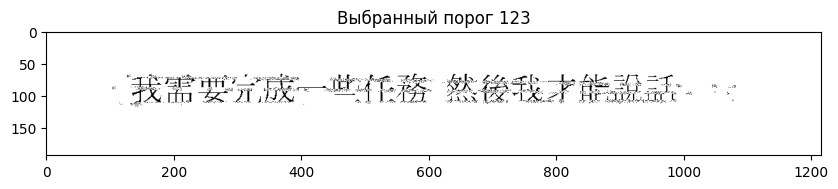

In [9]:
#threshold = 123
threshold = 123


ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
plt.figure(figsize=(10, 70))
#gs = plt.GridSpec(35, 2)
#plt.subplot(gs[0])
plt.imshow(thresh1, 'gray', vmin=0, vmax=255)
plt.title('Выбранный порог 123')

plt.show()

<img src="result4.png" width="800"/>
<img src="result4_rus.png" width="800"/>

# другие попытки

In [ ]:
Бинаризация Оцу (Otsu's Binarization)

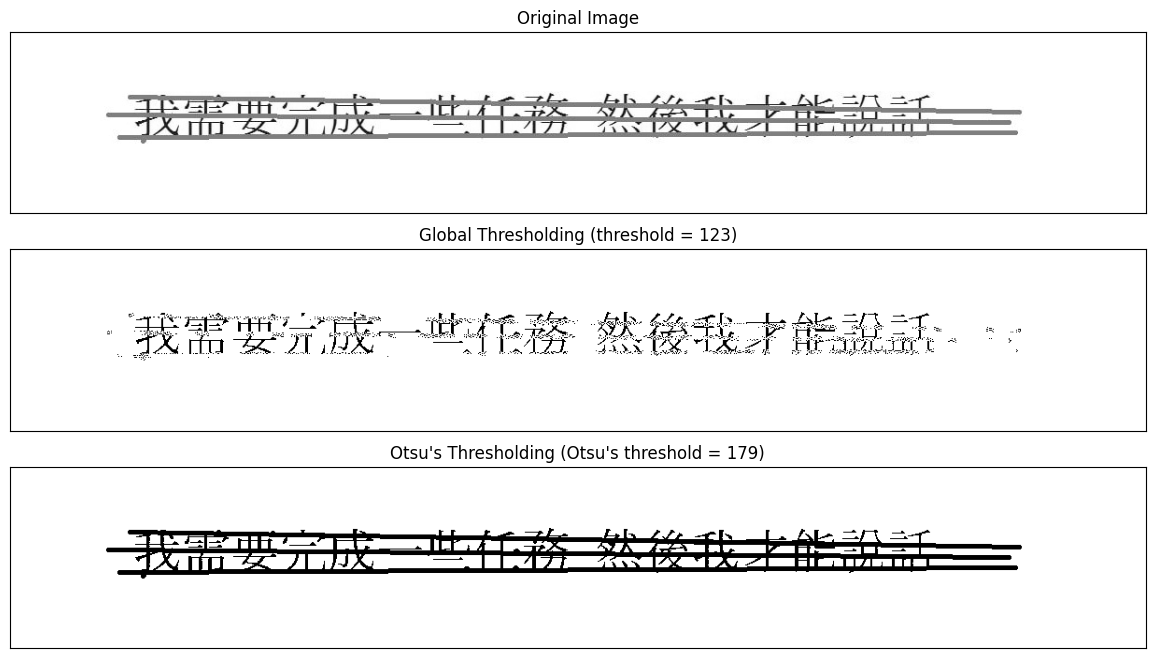

In [10]:
threshold = 123
ret1, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret2, thresh2 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
titles = ['Original Image', 'Global Thresholding (threshold = %d)' % threshold,
          "Otsu's Thresholding (Otsu's threshold = %d)" % ret2]
images = [image, thresh1, thresh2]

plt.figure(figsize=(30, 8))
for i in np.arange(len(images)):
    plt.subplot(3, 1, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

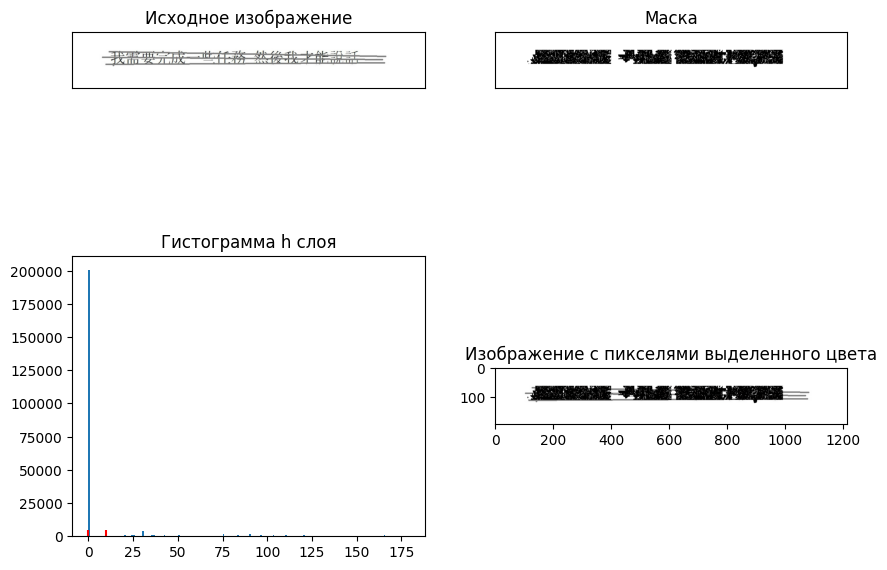

In [20]:
#1.5 Цветовая сегментация изображений
h, s, v = cv.split(hsv_image)

low_h = 0
high_h = 10

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image, rgb_image, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()

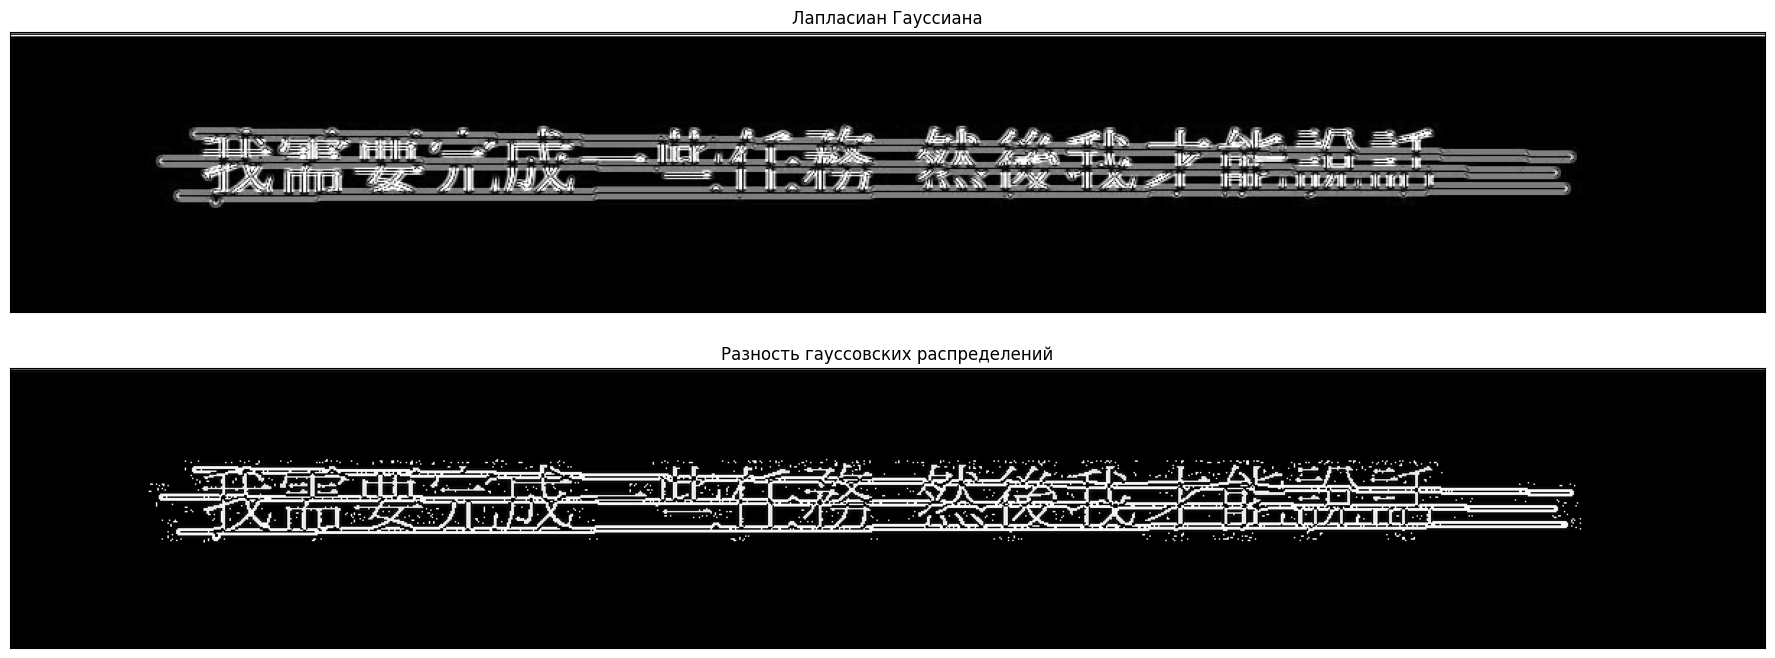

In [22]:
outImageDepth = cv.CV_16S  # глубина результирующего изображения. Т.к. входное изображение 8-битное, чтобы избежать переполнения сделаем выходное изображение 16-битное.

gaussian33 = cv.GaussianBlur(gray_image, (3, 3), 0)
gaussian55 = cv.GaussianBlur(gray_image, (5, 5), 0)


# laplace = cv.convertScaleAbs(laplace)
# вычисляем разность гауссовских разпределений
dog = gaussian33 - gaussian55
# dog = cv.convertScaleAbs(dog)
# вычисляем Лапласиан Гауссиана
log = cv.Laplacian(gaussian33, outImageDepth, ksize=3)
log = cv.convertScaleAbs(log)

# вывод
plt.figure(figsize=(150, 8))
gs = plt.GridSpec(2, 1)

titles = ['Лапласиан Гауссиана', 'Разность гауссовских раcпределений']
outImages = [log, dog]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()